In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("new_right_left.csv")
df.head()

,AnalogValue,Density,Amplitude,Result
0,1195,1194,1.46,0
1,1197,1198,1.46,0
2,1200,1211,1.47,0
3,1264,1265,1.54,0
4,1264,1264,1.54,0


In [4]:
len(df)

4000

In [5]:
df.tail()

,AnalogValue,Density,Amplitude,Result
3995,990,987,1.21,1
3996,970,975,1.18,1
3997,966,965,1.18,1
3998,961,964,1.17,1
3999,976,981,1.19,1


In [6]:
right = df.iloc[:500,:]
left = df.iloc[2000:2500,:]
right.head()

,AnalogValue,Density,Amplitude,Result
0,1195,1194,1.46,0
1,1197,1198,1.46,0
2,1200,1211,1.47,0
3,1264,1265,1.54,0
4,1264,1264,1.54,0


In [7]:
left.head()

,AnalogValue,Density,Amplitude,Result
2000,996,997,1.22,1
2001,996,1002,1.22,1
2002,991,995,1.21,1
2003,976,978,1.19,1
2004,976,976,1.19,1


In [8]:
data = pd.concat([right, left])
data = data.reset_index(drop = True)
data.head()

,AnalogValue,Density,Amplitude,Result
0,1195,1194,1.46,0
1,1197,1198,1.46,0
2,1200,1211,1.47,0
3,1264,1265,1.54,0
4,1264,1264,1.54,0


In [9]:
data.tail()

,AnalogValue,Density,Amplitude,Result
995,1187,1189,1.45,1
996,1205,1202,1.47,1
997,1225,1219,1.50,1
998,1218,1215,1.49,1
999,1210,1210,1.48,1


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()

,AnalogValue,Density,Amplitude
0,1195,1194,1.46
1,1197,1198,1.46
2,1200,1211,1.47
3,1264,1265,1.54
4,1264,1264,1.54


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

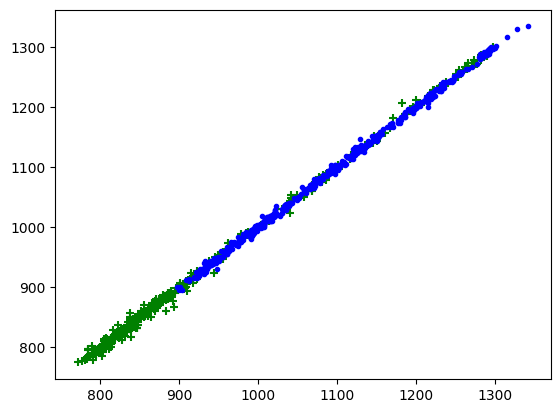

In [13]:
import matplotlib.pyplot as plt

plt.scatter(right["AnalogValue"], right["Density"] ,color = "green" , marker = "+")
plt.scatter(left["AnalogValue"], left["Density"] ,color = "blue", marker  = "." )



In [14]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)

# The scaled_data variable now contains the scaled values


In [15]:
X

array([[0.74125874, 0.74955277, 0.74285714],
       [0.74475524, 0.75670841, 0.74285714],
       [0.75      , 0.77996422, 0.75714286],
       ...,
       [0.79370629, 0.79427549, 0.8       ],
       [0.78146853, 0.78711986, 0.78571429],
       [0.76748252, 0.77817531, 0.77142857]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
X_train.shape

(800, 3, 1)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))


IndexError: tuple index out of range

In [20]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model_1 = Sequential()
model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))

# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

model_1.add(LSTM(units=64, return_sequences=True))
model_1.add(Dropout(0.2))

model_1.add(LSTM(units=64, return_sequences=True))
model_1.add(Dropout(0.2))

model_1.add(Dense(units=128, activation='relu'))

model_1.add(Dense(units=64, activation='relu'))

model_1.add(Dense(units=1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             128       
                                                                 
 lstm (LSTM)                 (None, 1, 64)             24832     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 128)            8320      
                                                                 
 dense_1 (Dense)             (None, 1, 64)             8

In [22]:
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.95:
            print("\nReached 95% accuracy, stopping training!")
            self.model.stop_training = True

# Create an instance of the callback
accuracy_stop_callback = AccuracyStopCallback()

# Pass the callback to the callbacks parameter when fitting the model
model_1.fit(X_train, y_train, callbacks=[accuracy_stop_callback], epochs = 100)


Epoch 1/100
25/25 [==============================] - 8s 6ms/step - loss: 0.6878 - accuracy: 0.5775
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.7425
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.8012
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5324 - accuracy: 0.7975
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.7962
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4177 - accuracy: 0.8238
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.8325
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3938 - accuracy: 0.8338
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3934 - accuracy: 0.8238
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.8363
Epoch 11/

25/25 [==============================] - 0s 5ms/step - loss: 0.3750 - accuracy: 0.8375
Epoch 84/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3751 - accuracy: 0.8350
Epoch 85/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8338
Epoch 86/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3779 - accuracy: 0.8350
Epoch 87/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3832 - accuracy: 0.8300
Epoch 88/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8313
Epoch 89/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3845 - accuracy: 0.8338
Epoch 90/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3825 - accuracy: 0.8313
Epoch 91/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3767 - accuracy: 0.8325
Epoch 92/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.8363
Epoch 93/100


In [24]:
predictions = model_1.predict(X_test)

7/7 [==============================] - 2s 3ms/step


In [25]:
for pred in predictions:
    predicted_class = 1 if pred[0][0] > 0.5 else 0
    print("Predicted class:", predicted_class)



Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted cl

In [27]:
# Assuming you have your test data and labels as X_test and y_test respectively

# Evaluate the model on the test data
loss, accuracy = model_1.evaluate(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


7/7 [==============================] - 2s 5ms/step - loss: 0.3883 - accuracy: 0.8350
Accuracy: 0.8349999785423279


In [28]:
# Assuming predictions and y_test are in the correct format
for pred, true_label in zip(predictions, y_test):
    predicted_class = 1 if pred[0][0] > 0.5 else 0
    print("Predicted class:", predicted_class)
    print("True label:", true_label)
    print("Matched:", predicted_class == true_label)
    print()


Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 0
Matched: False

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 0
Matched: False

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 1
True label: 1
Matched: True

Predicted class: 0
True label: 0
Matched: True

Predicted class: 1
True label: 1
Match

In [30]:
# Save the model
model_1.save("model_right_left.h5")
